## Prepare a classification model using SVM for salary data 

Data Description:

age -- age of a person
workclass	-- A work class is a grouping of work 
education	-- Education of an individuals	
maritalstatus -- Marital status of an individulas	
occupation	 -- occupation of an individuals
relationship -- 	
race --  Race of an Individual
sex --  Gender of an Individual
capitalgain --  profit received from the sale of an investment	
capitalloss	-- A decrease in the value of a capital asset
hoursperweek -- number of hours work per week	
native -- Native of an individual
Salary -- salary of an individual

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score


In [2]:
train_df = pd.read_csv('E:\\EXCELR\\PARTH SIR\\inclass excercises\\datasets\\svm\\Salarydata_Train.csv')

In [3]:
train_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
test_df = pd.read_csv('E:\\EXCELR\\PARTH SIR\\inclass excercises\\datasets\\svm\\Salarydata_Test.csv')

In [5]:
test_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [8]:
train_df.shape

(30161, 14)

In [9]:
test_df.shape

(15060, 14)

In [10]:
train_df.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [11]:
test_df.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [12]:
train_df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [13]:
test_df.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Salary', ylabel='hoursperweek'>

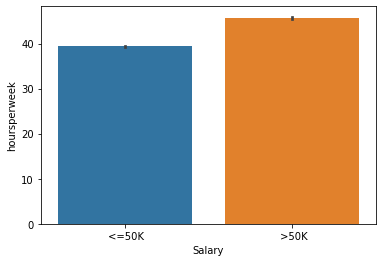

In [14]:
sns.barplot(x='Salary',y='hoursperweek',data=train_df)

<AxesSubplot:xlabel='Salary', ylabel='count'>

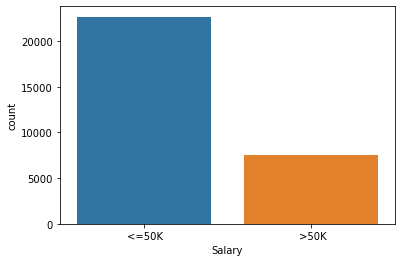

In [15]:
sns.countplot(x='Salary',data =train_df)

Text(0.5, 1.0, 'HeatMap of Features')

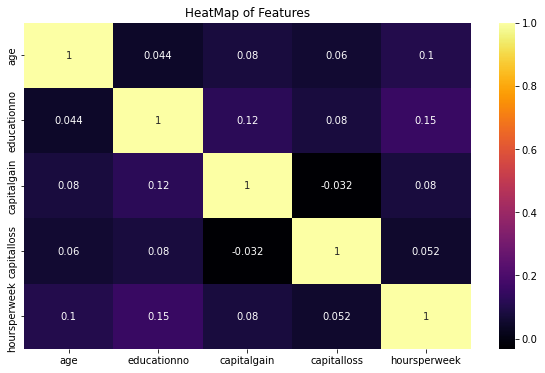

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(train_df.corr(),annot=True,cmap="inferno")
plt.title("HeatMap of Features")

# Data Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [18]:
train_df['workclass']=label.fit_transform(train_df['workclass'])

train_df['education']=label.fit_transform(train_df['education'])

train_df['maritalstatus']=label.fit_transform(train_df['maritalstatus'])

train_df['occupation']=label.fit_transform(train_df['occupation'])

train_df['relationship']=label.fit_transform(train_df['relationship'])

train_df['race']=label.fit_transform(train_df['race'])

train_df['sex']=label.fit_transform(train_df['sex'])

train_df['native']=label.fit_transform(train_df['native'])

train_df['Salary']=label.fit_transform(train_df['Salary'])

train_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [19]:
data=train_df.drop_duplicates()

In [20]:
data.shape

(26903, 14)

In [21]:
train_df.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

In [22]:
test_df['workclass']=label.fit_transform(test_df['workclass'])

test_df['education']=label.fit_transform(test_df['education'])

test_df['maritalstatus']=label.fit_transform(test_df['maritalstatus'])

test_df['occupation']=label.fit_transform(test_df['occupation'])

test_df['relationship']=label.fit_transform(test_df['relationship'])

test_df['race']=label.fit_transform(test_df['race'])

test_df['sex']=label.fit_transform(test_df['sex'])

test_df['native']=label.fit_transform(test_df['native'])

test_df['Salary']=label.fit_transform(test_df['Salary'])

test_df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [23]:
test_df.dtypes

age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object

# Model Building

In [24]:
X_train=data.drop(['Salary','educationno'],axis=1)
X_train

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,4,0,1,4,1,2174,0,40,37
1,50,4,9,2,3,0,4,1,0,0,13,37
2,38,2,11,0,5,1,4,1,0,0,40,37
3,53,2,1,2,5,0,2,1,0,0,40,37
4,28,2,9,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,2,3,0,4,1,0,0,40,37
30155,22,2,15,4,10,1,4,1,0,0,40,37
30156,27,2,7,2,12,5,4,0,0,0,38,37
30158,58,2,11,6,0,4,4,0,0,0,40,37


In [25]:
Y_train=data['Salary']
Y_train

0        0
1        0
2        0
3        0
4        0
        ..
30154    1
30155    0
30156    0
30158    0
30160    1
Name: Salary, Length: 26903, dtype: int32

In [26]:
X_test=test_df.drop(['Salary','educationno'],axis=1)
X_test

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,2,1,4,6,3,2,1,0,0,40,37
1,38,2,11,2,4,0,4,1,0,0,50,37
2,28,1,7,2,10,0,4,1,0,0,40,37
3,44,2,15,2,6,0,2,1,7688,0,40,37
4,34,2,0,4,7,1,4,1,0,0,30,37
...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,4,9,3,4,1,0,0,40,37
15056,39,2,9,0,9,1,4,0,0,0,36,37
15057,38,2,9,2,9,0,4,1,0,0,50,37
15058,44,2,9,0,0,3,1,1,5455,0,40,37


In [27]:
Y_test=test_df['Salary']
Y_test

0        0
1        0
2        1
3        1
4        0
        ..
15055    0
15056    0
15057    0
15058    0
15059    1
Name: Salary, Length: 15060, dtype: int32

In [28]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(26903, 12)
(15060, 12)
(26903,)
(15060,)


In [29]:
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = 1,l1_ratio=0.1) 
e_net.fit(X_train, Y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(X_test) 
mean_squared_error = np.mean((y_pred_elastic - Y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = X_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
print(e_net_coeff)


Mean Squared Error on test set 0.15843471867518005
          Columns  Coefficient Estimate
0             age              0.005597
1       workclass             -0.000000
2       education              0.001094
3   maritalstatus             -0.000000
4      occupation              0.000000
5    relationship             -0.000254
6            race              0.000000
7             sex              0.000000
8     capitalgain              0.000012
9     capitalloss              0.000146
10   hoursperweek              0.005997
11         native              0.000000


In [30]:
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(X_train, Y_train) 
y_pred = ridgeR.predict(X_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - Y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= X_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

0.1503372980834125
          Columns  Coefficient Estimate
0             age              0.004822
1       workclass             -0.012162
2       education              0.008132
3   maritalstatus             -0.024390
4      occupation              0.003718
5    relationship             -0.022184
6            race              0.016620
7             sex              0.094424
8     capitalgain              0.000011
9     capitalloss              0.000132
10   hoursperweek              0.004555
11         native              0.000609


In [31]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(X_train, Y_train) 
y_pred1 = lasso.predict(X_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - Y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = X_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Mean squared error on test set 0.16950601998846251
          Columns  Coefficient Estimate
0             age              0.000754
1       workclass              0.000000
2       education              0.000000
3   maritalstatus             -0.000000
4      occupation              0.000000
5    relationship             -0.000000
6            race              0.000000
7             sex              0.000000
8     capitalgain              0.000013
9     capitalloss              0.000158
10   hoursperweek              0.000444
11         native              0.000000


In [32]:
clf = SVC()

In [33]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.5],'C':[11] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
#gsv.fit(X_train,Y_train)

gsv.fit(X_train, Y_train)

gsv.best_params_ , gsv.best_score_ 

In [35]:
clf = SVC(kernel='rbf',C= 20, gamma = 50)
clf.fit(X_train , Y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(Y_test, y_pred)

Accuracy = 76.18193891102257


array([[11179,   181],
       [ 3406,   294]], dtype=int64)